In [1]:
import ensembles
import importlib
importlib.reload(ensembles) #this is for notebooks - otherwise I have to restart the kernel every time I change anything


import networks
importlib.reload(networks) #this is for notebooks - otherwise I have to restart the kernel every time I change anything



import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

In [21]:
num_epochs = 1200
#num_eps = 75#25#75
#seed = 43#43 is cool 101 1011
from global_vars import SEED as seed

params = {#'num_neurons':[3],
          'num_neurons':[10,10,10],
          'num_epochs':num_epochs,
          'learning_rate':0.1,
          'seed':seed,
         #'optimizer':tf.train.AdamOptimizer,
    'initialisation_scheme':tf.truncated_normal}




ensemble = [{'num_neurons':[10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,5,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,5,20],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,5],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10],'num_epochs':num_epochs}]#,'optimizer':tf.train.AdamOptimizer}]
        
ensemble = [{'num_neurons':[2],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[3],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[4],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[5],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[6],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[7],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10],'num_epochs':num_epochs}]#,'optimizer':tf.train.AdamOptimizer}]
          
    
bootstrap_ensemble_stats = {'num_neurons':[10,10,10],'num_epochs':num_epochs,          'learning_rate':0.1,
#'optimizer':tf.train.AdamOptimizer,
                            'initialisation_scheme':tf.truncated_normal}


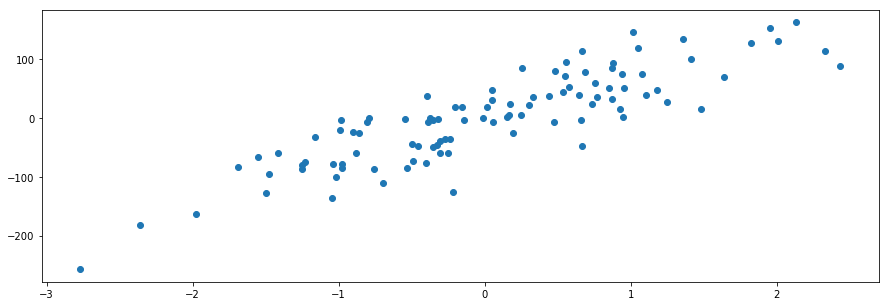

In [22]:
X, y = make_regression(n_samples=100, n_features=1, noise=35,random_state=430)#,n_informative=1,bias=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=430)
plt.scatter(X,y)

In [23]:
y_test.shape, X_test.shape

((30,), (30, 1))

# Vanilla Ensemble

(30,)
(30, 1)


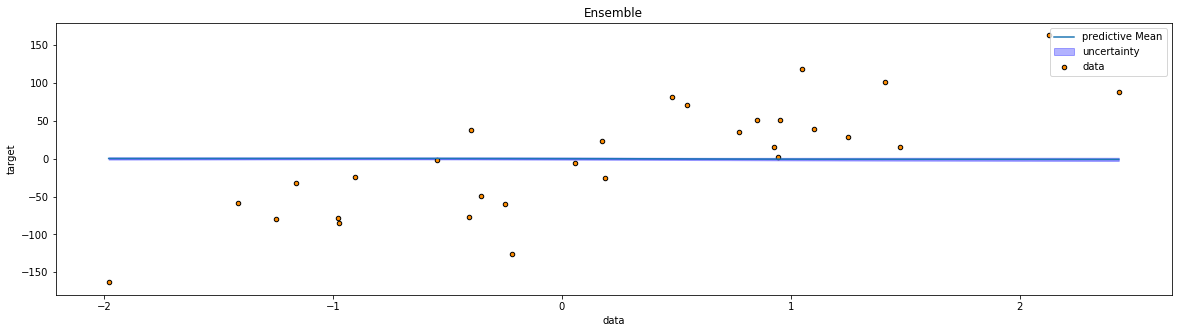

In [24]:
vanialla_ensemble = ensembles.VanillaEnsemble(estimator_stats = ensemble)
plot = vanialla_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

(30,)
(30, 1)


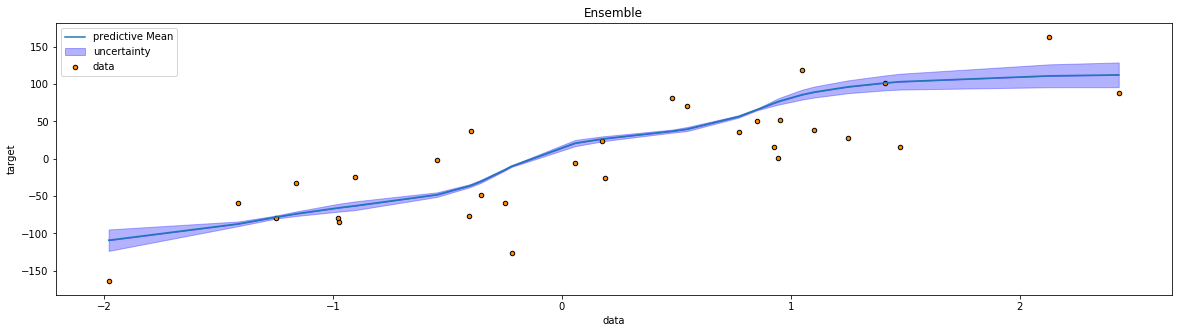

In [25]:
vanialla_ensemble.fit(X_train,y_train)
plot = vanialla_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

In [26]:
vanialla_ensemble.self_evaluate(X_test,y_test)


{'NLPD': -1427.588477606959,
 'correlation between error and variance': 0.0007134183064808327,
 'coverage probability': 0.1,
 'rsme': 101.59434440100395}

# Bootstrap Ensemble

(30,)
(30, 1)


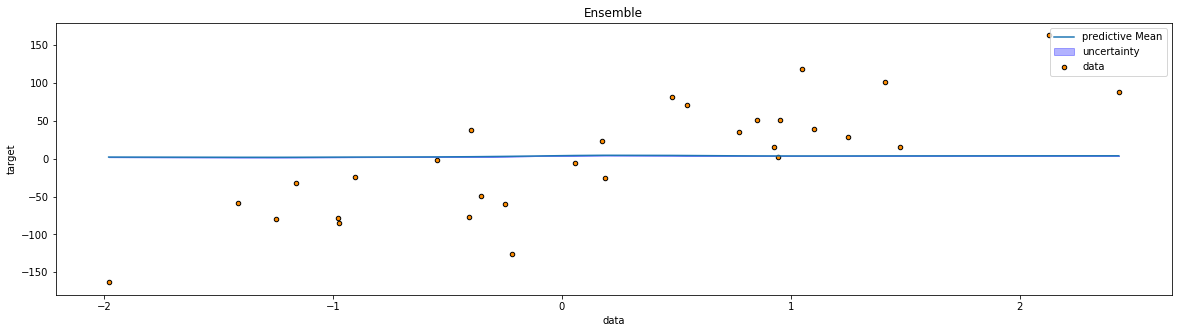

In [27]:
bootstrap_ensemble = ensembles.BootstrapEnsemble(estimator_stats = bootstrap_ensemble_stats)
plot = bootstrap_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


(30,)
(30, 1)


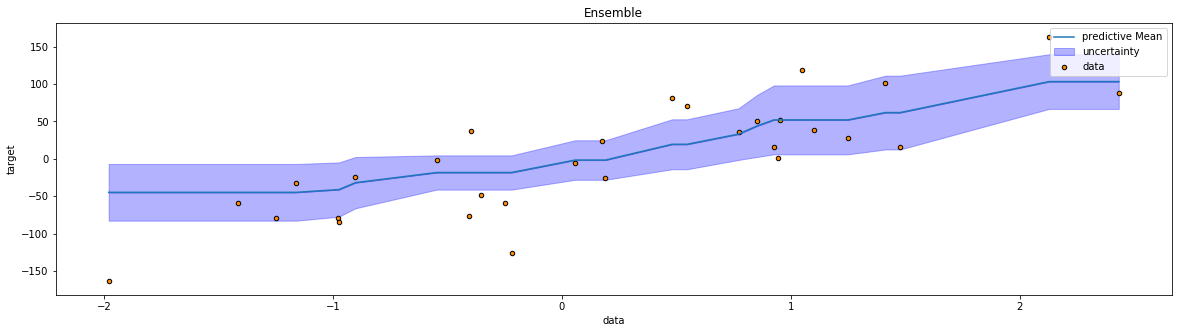

In [28]:
bootstrap_ensemble.fit(X_train,y_train)
plot = bootstrap_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

In [29]:
bootstrap_ensemble.self_evaluate(X_test,y_test)


{'NLPD': -109.30277535705132,
 'correlation between error and variance': -0.12182180766859563,
 'coverage probability': 0.5666666666666667,
 'rsme': 86.30388242122697}

# DropoutNetwork

(30,)
(30, 1)


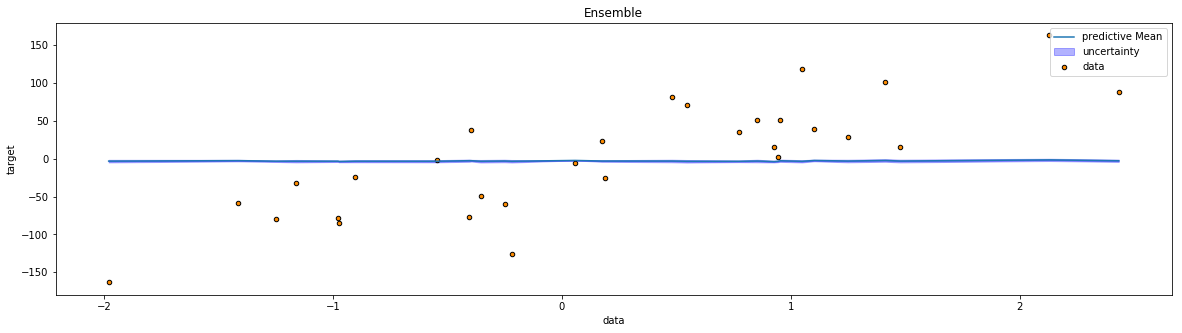

In [30]:
dropout_network = networks.DropoutNetwork(**params)
plot = dropout_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


(30,)
(30, 1)


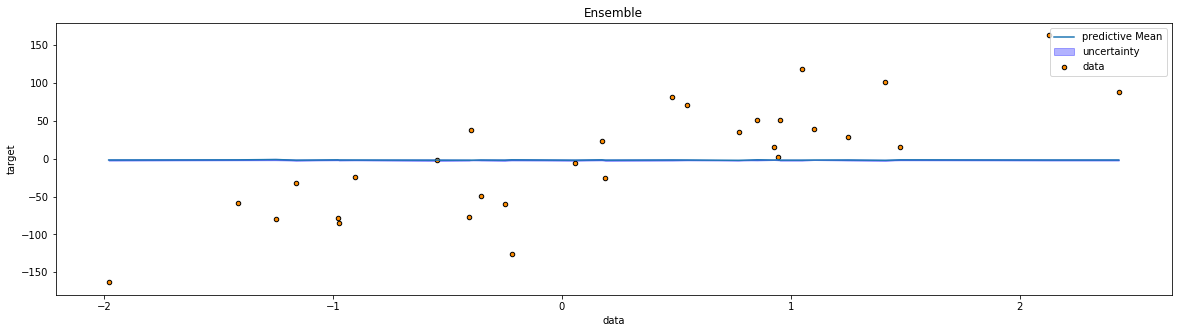

In [31]:
dropout_network.fit(X_train,y_train)
plot = dropout_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


In [32]:
dropout_network.self_evaluate(X_test,y_test)


{'NLPD': -4484338.627215723,
 'correlation between error and variance': -0.01903585879540518,
 'coverage probability': 0.0,
 'rsme': 73.3964611723505}

# GaussianLoss Networks

(30,)
(30, 1)


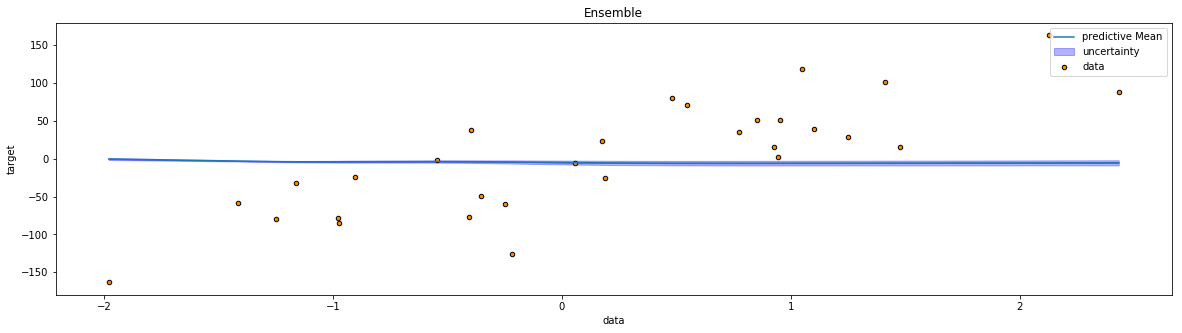

In [33]:
gl_network = networks.GaussianLossNetwork(**params)
plot = gl_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


(30,)
(30, 1)


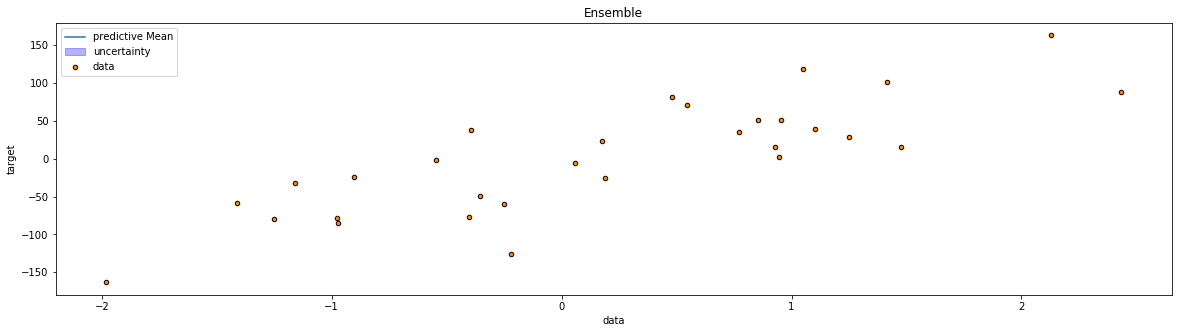

In [34]:
gl_network.fit(X_train,y_train,False)

plot = gl_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))



In [35]:
gl_network.self_evaluate(X_test,y_test)


{'NLPD': nan,
 'correlation between error and variance': nan,
 'coverage probability': 0.0,
 'rsme': nan}

# LR NEtwork

(30,)
(30, 1)


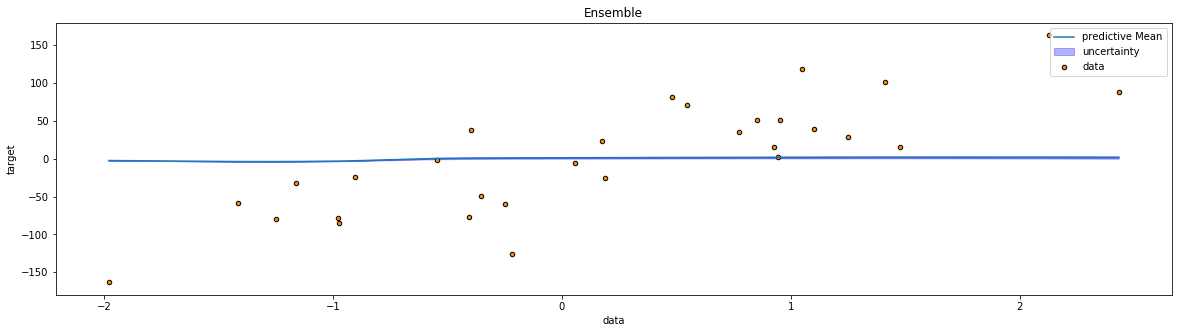

In [36]:
gl_lr_network = networks.GaussianLearningRateNetwork(**params)
plot = gl_lr_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


(30,)
(30, 1)


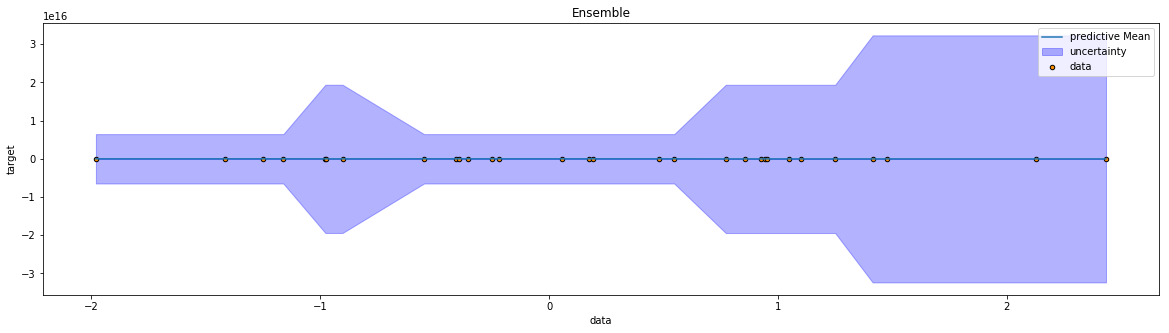

In [38]:
gl_lr_network.fit(X_train,y_train)#,False)

plot = gl_lr_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


In [39]:
gl_network.self_evaluate(X_test,y_test)


{'NLPD': nan,
 'correlation between error and variance': nan,
 'coverage probability': 0.0,
 'rsme': nan}

In [ ]:

import helpers

importlib.reload(helpers) #this is for notebooks - otherwise I have to restart the kernel every time I change anything


In [ ]:
helpers.show_graph(gl_network.g)